In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def grayscale(img):
    img_gray = img[:, :, 0] * 0.0722 + img[:, :, 1] * 0.7152 + img[:, :, 2] * 0.2126
    return img_gray

In [3]:
# Load image
img = cv2.imread("../imori.jpg")
img_gray = np.array(grayscale(img)).astype("uint8")

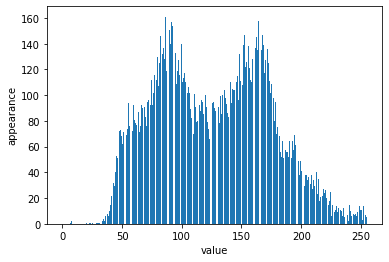

In [4]:
# Show brightness value histogram
plt.hist(img_gray.ravel(), bins=255, rwidth=0.8, range=(0, 255))
plt.xlabel('value')
plt.ylabel('appearance')
plt.show()

In [5]:
# Otsu's binarization algorithm
max_variance, threshold = -1, -1
for v in range(0, 256):
    c0 = np.count_nonzero(img_gray < v)
    c1 = img_gray.shape[0] * img_gray.shape[1] - c0
    v0 = img_gray[np.where(img_gray < v)]
    v1 = img_gray[np.where(img_gray >= v)]
    m0 = np.mean(v0) if len(v0) > 0 else 0
    m1 = np.mean(v1) if len(v1) > 0 else 0
    variance = c0*c1/((c0+c1)**2) * ((m0-m1)**2)
    if variance > max_variance:
        max_variance = variance
        threshold = v

print("image shape =", img_gray.shape)
print("optimal threshold =", threshold)

image shape = (128, 128)
optimal threshold = 127


In [6]:
img_binary = np.vectorize(lambda x: 0 if x < threshold else 255)(img_gray)

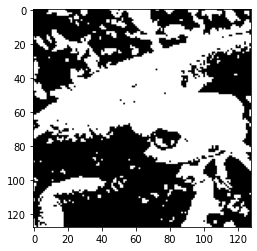

In [7]:
plt.imshow(img_binary, cmap="gray")
plt.show()